In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import glob
from datetime import datetime

# Discharge Data Processing

In [2]:
df = pd.read_excel(r"../../Output (Dry Season)/Full_Cycle_Discharge/Sibsa_Spring_Nalian_with_Forecast.xlsx")
df

,Date,Time,Date_Time,Discharge (m3/s),Velocity (m/s)
0,2025-04-27,05:59:24,2025-04-27 06:00:00,8305.013000,0.789
1,2025-04-27,06:29:26,2025-04-27 06:30:00,4026.601000,0.351
2,2025-04-27,07:00:15,2025-04-27 07:00:00,-2328.490000,-0.320
3,2025-04-27,08:00:13,2025-04-27 08:00:00,-18480.798000,-1.379
4,2025-04-27,09:00:51,2025-04-27 09:00:00,-23189.312000,-1.435
5,2025-04-27,09:59:10,2025-04-27 10:00:00,-19284.157000,-1.068
6,2025-04-27,10:59:44,2025-04-27 11:00:00,-8982.780000,-0.470
7,2025-04-27,12:00:20,2025-04-27 12:00:00,-363.443000,-0.028
8,2025-04-27,13:00:51,2025-04-27 13:00:00,3458.312000,0.229
9,2025-04-27,13:58:56,2025-04-27 14:00:00,8064.961000,0.529


In [3]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
required_end_time = df['Date_Time'].iloc[0] + pd.Timedelta(hours=12, minutes=25)
required_end_time

Timestamp('2025-04-27 18:25:00')

In [4]:
q_df = df[ df['Date_Time'] <= required_end_time ]
q_df

,Date,Time,Date_Time,Discharge (m3/s),Velocity (m/s)
0,2025-04-27,05:59:24,2025-04-27 06:00:00,8305.013000,0.789
1,2025-04-27,06:29:26,2025-04-27 06:30:00,4026.601000,0.351
2,2025-04-27,07:00:15,2025-04-27 07:00:00,-2328.490000,-0.320
3,2025-04-27,08:00:13,2025-04-27 08:00:00,-18480.798000,-1.379
4,2025-04-27,09:00:51,2025-04-27 09:00:00,-23189.312000,-1.435
5,2025-04-27,09:59:10,2025-04-27 10:00:00,-19284.157000,-1.068
6,2025-04-27,10:59:44,2025-04-27 11:00:00,-8982.780000,-0.470
7,2025-04-27,12:00:20,2025-04-27 12:00:00,-363.443000,-0.028
8,2025-04-27,13:00:51,2025-04-27 13:00:00,3458.312000,0.229
9,2025-04-27,13:58:56,2025-04-27 14:00:00,8064.961000,0.529


# Sediment Data Processing

In [5]:
df2 = pd.read_csv(r"../../Dry_Season_SSC/Sibsa_River_DS_Dry_Season_SSC_2025_Weighted.csv")
df2

,River,Date,Time,Date_Time,Relative Depth,Sampling Depth (m),Easting (m),Northing (m),SSC (mg/l),Weight,Weighted SSC (mg/l)
0,Sibsa River (DS),27/04/2025,6:00:00,27/04/2025 6:00,0.8,13.640,750456,2486307,624.9473,0.4,249.9789
1,Sibsa River (DS),27/04/2025,6:00:00,27/04/2025 6:00,0.6,10.230,750456,2486307,504.4960,0.3,151.3488
2,Sibsa River (DS),27/04/2025,6:00:00,27/04/2025 6:00,0.2,3.410,750456,2486307,427.6690,0.3,128.3007
3,Sibsa River (DS),27/04/2025,7:00:00,27/04/2025 7:00,0.8,13.640,750456,2486307,772.2250,0.4,308.8900
4,Sibsa River (DS),27/04/2025,7:00:00,27/04/2025 7:00,0.6,10.230,750456,2486307,556.1167,0.3,166.8350
...,...,...,...,...,...,...,...,...,...,...,...
67,Sibsa River (DS),06/05/2025,15:00:00,06/05/2025 15:00,0.6,12.396,750383,2486318,135.2069,0.3,40.5621
68,Sibsa River (DS),06/05/2025,15:00:00,06/05/2025 15:00,0.2,4.132,750383,2486318,74.8021,0.3,22.4406
69,Sibsa River (DS),06/05/2025,16:00:00,06/05/2025 16:00,0.8,16.208,750383,2486318,224.4190,0.4,89.7676
70,Sibsa River (DS),06/05/2025,16:00:00,06/05/2025 16:00,0.6,12.156,750383,2486318,168.4107,0.3,50.5232


In [6]:
df2['Date_Time'] = pd.to_datetime(df2['Date_Time'])
s_df = df2[df2['Date_Time'].dt.date.isin(df['Date_Time'].dt.date)]
s_df

C:\Users\mji.IWMDC0\AppData\Local\Temp\ipykernel_408\2403562445.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date_Time'] = pd.to_datetime(df2['Date_Time'])


,River,Date,Time,Date_Time,Relative Depth,Sampling Depth (m),Easting (m),Northing (m),SSC (mg/l),Weight,Weighted SSC (mg/l)
0,Sibsa River (DS),27/04/2025,6:00:00,2025-04-27 06:00:00,0.8,13.640,750456,2486307,624.9473,0.4,249.9789
1,Sibsa River (DS),27/04/2025,6:00:00,2025-04-27 06:00:00,0.6,10.230,750456,2486307,504.4960,0.3,151.3488
2,Sibsa River (DS),27/04/2025,6:00:00,2025-04-27 06:00:00,0.2,3.410,750456,2486307,427.6690,0.3,128.3007
3,Sibsa River (DS),27/04/2025,7:00:00,2025-04-27 07:00:00,0.8,13.640,750456,2486307,772.2250,0.4,308.8900
4,Sibsa River (DS),27/04/2025,7:00:00,2025-04-27 07:00:00,0.6,10.230,750456,2486307,556.1167,0.3,166.8350
5,Sibsa River (DS),27/04/2025,7:00:00,2025-04-27 07:00:00,0.2,3.410,750456,2486307,428.0691,0.3,128.4207
6,Sibsa River (DS),27/04/2025,8:00:00,2025-04-27 08:00:00,0.8,15.280,750456,2486307,725.3985,0.4,290.1594
7,Sibsa River (DS),27/04/2025,8:00:00,2025-04-27 08:00:00,0.6,11.460,750456,2486307,704.9875,0.3,211.4963
8,Sibsa River (DS),27/04/2025,8:00:00,2025-04-27 08:00:00,0.2,3.820,750456,2486307,510.8985,0.3,153.2695
9,Sibsa River (DS),27/04/2025,9:00:00,2025-04-27 09:00:00,0.8,16.560,750456,2486307,1833.2674,0.4,733.3070


In [7]:
weighted_s_df = s_df.groupby(['Date_Time'])['Weighted SSC (mg/l)'].sum().reset_index()
weighted_s_df

,Date_Time,Weighted SSC (mg/l)
0,2025-04-27 06:00:00,529.6284
1,2025-04-27 07:00:00,604.1457
2,2025-04-27 08:00:00,654.9252
3,2025-04-27 09:00:00,1482.7023
4,2025-04-27 10:00:00,1296.8079
5,2025-04-27 11:00:00,829.7426
6,2025-04-27 12:00:00,825.9416
7,2025-04-27 13:00:00,819.7777
8,2025-04-27 14:00:00,761.5805
9,2025-04-27 15:00:00,783.0863


In [8]:
merged_df = q_df.merge(weighted_s_df, how='outer', on='Date_Time')
merged_df

,Date,Time,Date_Time,Discharge (m3/s),Velocity (m/s),Weighted SSC (mg/l)
0,2025-04-27,05:59:24,2025-04-27 06:00:00,8305.013000,0.789,529.6284
1,2025-04-27,06:29:26,2025-04-27 06:30:00,4026.601000,0.351,NaN
2,2025-04-27,07:00:15,2025-04-27 07:00:00,-2328.490000,-0.320,604.1457
3,2025-04-27,08:00:13,2025-04-27 08:00:00,-18480.798000,-1.379,654.9252
4,2025-04-27,09:00:51,2025-04-27 09:00:00,-23189.312000,-1.435,1482.7023
5,2025-04-27,09:59:10,2025-04-27 10:00:00,-19284.157000,-1.068,1296.8079
6,2025-04-27,10:59:44,2025-04-27 11:00:00,-8982.780000,-0.470,829.7426
7,2025-04-27,12:00:20,2025-04-27 12:00:00,-363.443000,-0.028,825.9416
8,2025-04-27,13:00:51,2025-04-27 13:00:00,3458.312000,0.229,819.7777
9,2025-04-27,13:58:56,2025-04-27 14:00:00,8064.961000,0.529,761.5805


In [9]:
def zero_discharge_time(df, datetime_column_label, discharge_column_label):
    
    # Interpolate all zero discharge times
    merged_df = df
    time_column = datetime_column_label
    discharge_column = discharge_column_label

    zero_crossings = []

    for i in range(1, len(merged_df)):
        d0 = merged_df.loc[i - 1, discharge_column]
        d1 = merged_df.loc[i, discharge_column]

        if d0 * d1 < 0:  # Sign change: zero crossing
            t0 = merged_df.loc[i - 1, time_column]
            t1 = merged_df.loc[i, time_column]

            # Linear interpolation
            t_zero = t0 + (t1 - t0) * (-d0 / (d1 - d0))

            zero_crossings.append({time_column : t_zero, discharge_column: 0.0})

    # Step 3: Add zero crossings to original DataFrame
    zero_df = pd.DataFrame(zero_crossings)
    merged_with_zero_df = pd.concat([merged_df, zero_df], ignore_index=True).sort_values(time_column).reset_index(drop=True)
    return merged_with_zero_df

zero_q_df = zero_discharge_time(df = merged_df, datetime_column_label = 'Date_Time', discharge_column_label = 'Discharge (m3/s)')
zero_q_df

,Date,Time,Date_Time,Discharge (m3/s),Velocity (m/s),Weighted SSC (mg/l)
0,2025-04-27,05:59:24,2025-04-27 06:00:00.000000000,8305.013000,0.789,529.6284
1,2025-04-27,06:29:26,2025-04-27 06:30:00.000000000,4026.601000,0.351,NaN
2,NaT,NaN,2025-04-27 06:49:00.484345542,0.000000,NaN,NaN
3,2025-04-27,07:00:15,2025-04-27 07:00:00.000000000,-2328.490000,-0.320,604.1457
4,2025-04-27,08:00:13,2025-04-27 08:00:00.000000000,-18480.798000,-1.379,654.9252
5,2025-04-27,09:00:51,2025-04-27 09:00:00.000000000,-23189.312000,-1.435,1482.7023
6,2025-04-27,09:59:10,2025-04-27 10:00:00.000000000,-19284.157000,-1.068,1296.8079
7,2025-04-27,10:59:44,2025-04-27 11:00:00.000000000,-8982.780000,-0.470,829.7426
8,2025-04-27,12:00:20,2025-04-27 12:00:00.000000000,-363.443000,-0.028,825.9416
9,NaT,NaN,2025-04-27 12:05:42.354441872,0.000000,NaN,NaN


In [10]:
# zero_q_df['Date_Time'] = pd.to_datetime(zero_q_df['Date_Time'])
zero_q_df.set_index('Date_Time', inplace=True)
zero_q_df['Weighted SSC (mg/l)'] = zero_q_df['Weighted SSC (mg/l)'].interpolate(method="time", limit_direction='both')
zero_q_df.dropna(subset=['Discharge (m3/s)'], inplace = True)
zero_q_df.reset_index(inplace=True)
zero_q_df

,Date_Time,Date,Time,Discharge (m3/s),Velocity (m/s),Weighted SSC (mg/l)
0,2025-04-27 06:00:00.000000000,2025-04-27,05:59:24,8305.013000,0.789,529.628400
1,2025-04-27 06:30:00.000000000,2025-04-27,06:29:26,4026.601000,0.351,566.887050
2,2025-04-27 06:49:00.484345542,NaT,NaN,0.000000,NaN,590.494221
3,2025-04-27 07:00:00.000000000,2025-04-27,07:00:15,-2328.490000,-0.320,604.145700
4,2025-04-27 08:00:00.000000000,2025-04-27,08:00:13,-18480.798000,-1.379,654.925200
5,2025-04-27 09:00:00.000000000,2025-04-27,09:00:51,-23189.312000,-1.435,1482.702300
6,2025-04-27 10:00:00.000000000,2025-04-27,09:59:10,-19284.157000,-1.068,1296.807900
7,2025-04-27 11:00:00.000000000,2025-04-27,10:59:44,-8982.780000,-0.470,829.742600
8,2025-04-27 12:00:00.000000000,2025-04-27,12:00:20,-363.443000,-0.028,825.941600
9,2025-04-27 12:05:42.354441872,NaT,NaN,0.000000,NaN,825.355423


# Sediment Load Calculation and Plotting

In [11]:
q_sc_df = zero_q_df[['Date_Time', 'Discharge (m3/s)', 'Weighted SSC (mg/l)']]
q_sc_df

,Date_Time,Discharge (m3/s),Weighted SSC (mg/l)
0,2025-04-27 06:00:00.000000000,8305.013000,529.628400
1,2025-04-27 06:30:00.000000000,4026.601000,566.887050
2,2025-04-27 06:49:00.484345542,0.000000,590.494221
3,2025-04-27 07:00:00.000000000,-2328.490000,604.145700
4,2025-04-27 08:00:00.000000000,-18480.798000,654.925200
5,2025-04-27 09:00:00.000000000,-23189.312000,1482.702300
6,2025-04-27 10:00:00.000000000,-19284.157000,1296.807900
7,2025-04-27 11:00:00.000000000,-8982.780000,829.742600
8,2025-04-27 12:00:00.000000000,-363.443000,825.941600
9,2025-04-27 12:05:42.354441872,0.000000,825.355423


In [12]:
q_sc_df['Sediment Flow (kg/s)'] = (q_sc_df['Discharge (m3/s)'] * q_sc_df['Weighted SSC (mg/l)'] / 1000)
q_sc_df

C:\Users\mji.IWMDC0\AppData\Local\Temp\ipykernel_408\3660503677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_sc_df['Sediment Flow (kg/s)'] = (q_sc_df['Discharge (m3/s)'] * q_sc_df['Weighted SSC (mg/l)'] / 1000)


,Date_Time,Discharge (m3/s),Weighted SSC (mg/l),Sediment Flow (kg/s)
0,2025-04-27 06:00:00.000000000,8305.013000,529.628400,4398.570747
1,2025-04-27 06:30:00.000000000,4026.601000,566.887050,2282.627962
2,2025-04-27 06:49:00.484345542,0.000000,590.494221,0.000000
3,2025-04-27 07:00:00.000000000,-2328.490000,604.145700,-1406.747221
4,2025-04-27 08:00:00.000000000,-18480.798000,654.925200,-12103.540326
5,2025-04-27 09:00:00.000000000,-23189.312000,1482.702300,-34382.846238
6,2025-04-27 10:00:00.000000000,-19284.157000,1296.807900,-25007.847142
7,2025-04-27 11:00:00.000000000,-8982.780000,829.742600,-7453.395232
8,2025-04-27 12:00:00.000000000,-363.443000,825.941600,-300.182693
9,2025-04-27 12:05:42.354441872,0.000000,825.355423,0.000000


In [13]:
sediment_loads = [None]

for i in range(1, len(q_sc_df)):
    flow1 = q_sc_df.loc[i - 1, "Sediment Flow (kg/s)"]
    flow2 = q_sc_df.loc[i, "Sediment Flow (kg/s)"]
    time1 = q_sc_df.loc[i - 1, "Date_Time"]
    time2 = q_sc_df.loc[i, "Date_Time"]

    delta_t = (time2 - time1).total_seconds()
    load = 0.5 * (flow1 + flow2) * delta_t / 1000000
    sediment_loads.append(load)

q_sc_df.loc[:, 'Sediment Load (million kg)']  = sediment_loads
q_sc_df

C:\Users\mji.IWMDC0\AppData\Local\Temp\ipykernel_408\1603777872.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_sc_df.loc[:, 'Sediment Load (million kg)']  = sediment_loads


,Date_Time,Discharge (m3/s),Weighted SSC (mg/l),Sediment Flow (kg/s),Sediment Load (million kg)
0,2025-04-27 06:00:00.000000000,8305.013000,529.628400,4398.570747,NaN
1,2025-04-27 06:30:00.000000000,4026.601000,566.887050,2282.627962,6.013079
2,2025-04-27 06:49:00.484345542,0.000000,590.494221,0.000000,1.301651
3,2025-04-27 07:00:00.000000000,-2328.490000,604.145700,-1406.747221,-0.463886
4,2025-04-27 08:00:00.000000000,-18480.798000,654.925200,-12103.540326,-24.318518
5,2025-04-27 09:00:00.000000000,-23189.312000,1482.702300,-34382.846238,-83.675496
6,2025-04-27 10:00:00.000000000,-19284.157000,1296.807900,-25007.847142,-106.903248
7,2025-04-27 11:00:00.000000000,-8982.780000,829.742600,-7453.395232,-58.430236
8,2025-04-27 12:00:00.000000000,-363.443000,825.941600,-300.182693,-13.956440
9,2025-04-27 12:05:42.354441872,0.000000,825.355423,0.000000,-0.051384


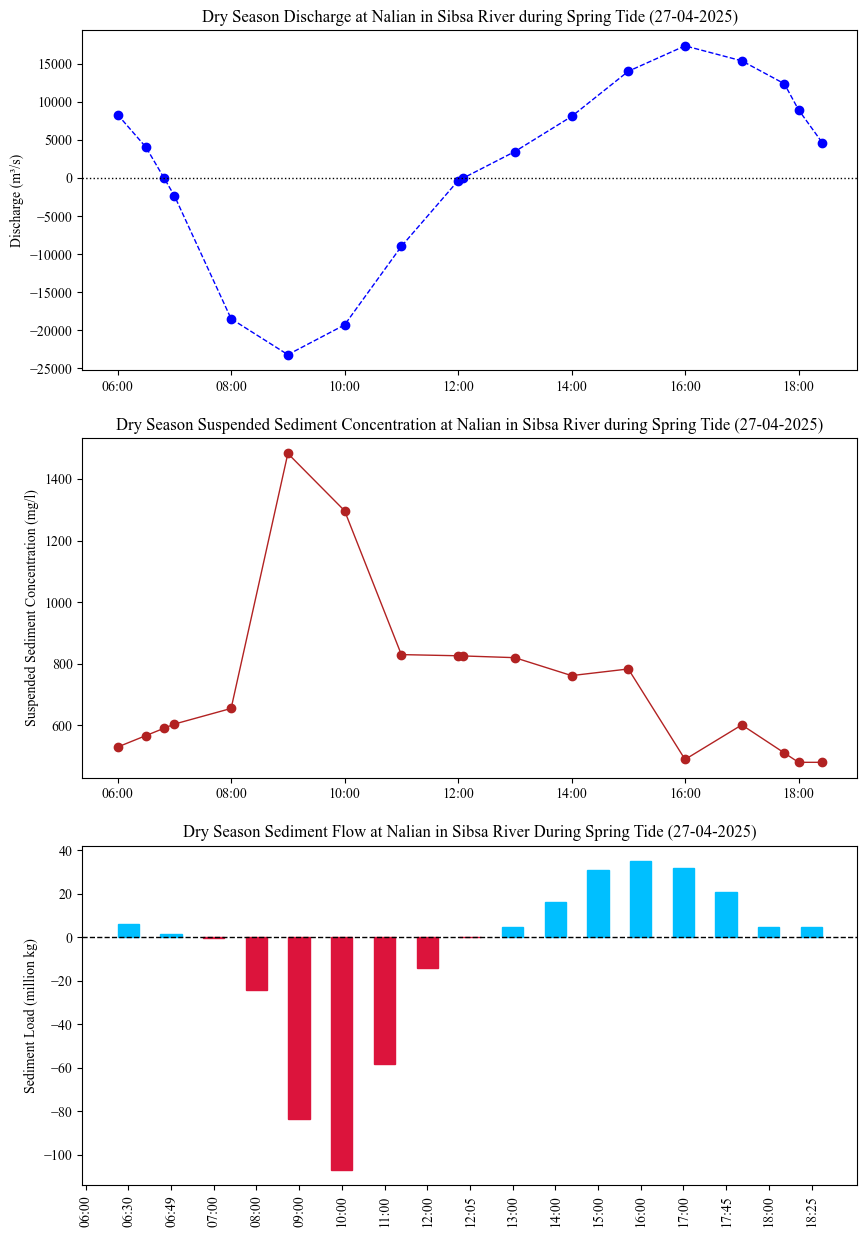

In [14]:
station_name = 'Nalian'
river_name = 'Sibsa'
tidal_phase = 'Spring'
mesurement_date = (q_sc_df["Date_Time"].dt.strftime('%d-%m-%Y')).unique()[0]

font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 10}

plt.rc('font', **font)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

plot1_h_axis = q_sc_df['Date_Time']
plot1_v_axis = q_sc_df['Discharge (m3/s)']

ax[0].plot(plot1_h_axis, plot1_v_axis, linestyle= '--', marker='o', lw=1, color='blue', label='Observed Discharge')
ax[0].axhline(0, color='black', linewidth=1, linestyle='dotted', c='black')
ax[0].set_ylabel('Discharge (m\u00b3/s)')
time_format = mdates.DateFormatter('%H:%M')
ax[0].xaxis.set_major_formatter(time_format)
ax[0].set_title(f'Dry Season Discharge at {station_name} in {river_name} River during {tidal_phase} Tide ({mesurement_date})')

plot2_h_axis = q_sc_df['Date_Time']
plot2_v_axis = q_sc_df['Weighted SSC (mg/l)']

ax[1].plot(plot2_h_axis, plot2_v_axis, linestyle= '-', marker='o', lw=1, color='firebrick', label='SSC')
ax[1].set_ylabel('Suspended Sediment Concentration (mg/l)')
time_format = mdates.DateFormatter('%H:%M')
ax[1].xaxis.set_major_formatter(time_format)
ax[1].set_title(f'Dry Season Suspended Sediment Concentration at {station_name} in {river_name} River during {tidal_phase} Tide ({mesurement_date})')

bar_hor_axis = q_sc_df['Date_Time'].dt.strftime('%H:%M')
bar_ver_axis = q_sc_df['Sediment Load (million kg)']

bars = ax[2].bar(bar_hor_axis, bar_ver_axis, width=0.5)
ax[2].axhline(0, color='black', linewidth=1, linestyle='--', c='black')
ax[2].set_ylabel('Sediment Load (million kg)')
ax[2].tick_params(axis='x', labelrotation=90)
ax[2].set_title(f'Dry Season Sediment Flow at {station_name} in {river_name} River During {tidal_phase} Tide ({mesurement_date})')

for bar in bars:
    if bar.get_height() < 0:
        bar.set_color('crimson')
    else:
        bar.set_color('deepskyblue')

fig.savefig(r"..\..\Output (Dry Season)\Sediment_Load\{}_{}_{}_Sediment_Load.jpg".format(river_name, station_name, tidal_phase), 
            bbox_inches='tight', dpi=300)

In [15]:
for i in range(len(q_sc_df['Discharge (m3/s)'])):
    
    if q_sc_df.loc[i, 'Discharge (m3/s)'] <0:
        q_sc_df.loc[i, 'Flow Type'] = 'Flood'

    elif q_sc_df.loc[i, 'Discharge (m3/s)'] == 0 :
        
        if q_sc_df.loc[i-1, 'Discharge (m3/s)'] <0:
            q_sc_df.loc[i, 'Flow Type'] = 'Flood'
        
        elif q_sc_df.loc[i-1, 'Discharge (m3/s)'] >0:
            q_sc_df.loc[i, 'Flow Type'] = 'Ebb'

        else:
            q_sc_df.loc[i, 'Flow Type'] = 'Error!!'

    else:
        q_sc_df.loc[i, 'Flow Type'] = 'Ebb'

q_sc_df

,Date_Time,Discharge (m3/s),Weighted SSC (mg/l),Sediment Flow (kg/s),Sediment Load (million kg),Flow Type
0,2025-04-27 06:00:00.000000000,8305.013000,529.628400,4398.570747,NaN,Ebb
1,2025-04-27 06:30:00.000000000,4026.601000,566.887050,2282.627962,6.013079,Ebb
2,2025-04-27 06:49:00.484345542,0.000000,590.494221,0.000000,1.301651,Ebb
3,2025-04-27 07:00:00.000000000,-2328.490000,604.145700,-1406.747221,-0.463886,Flood
4,2025-04-27 08:00:00.000000000,-18480.798000,654.925200,-12103.540326,-24.318518,Flood
5,2025-04-27 09:00:00.000000000,-23189.312000,1482.702300,-34382.846238,-83.675496,Flood
6,2025-04-27 10:00:00.000000000,-19284.157000,1296.807900,-25007.847142,-106.903248,Flood
7,2025-04-27 11:00:00.000000000,-8982.780000,829.742600,-7453.395232,-58.430236,Flood
8,2025-04-27 12:00:00.000000000,-363.443000,825.941600,-300.182693,-13.956440,Flood
9,2025-04-27 12:05:42.354441872,0.000000,825.355423,0.000000,-0.051384,Flood


In [16]:
q_sc_df.to_excel(r"..\..\Output (Dry Season)\Sediment_Load\{}_{}_{}_Sediment_Load.xlsx".format(river_name, station_name, tidal_phase),
                 float_format='%.4f', index=False)

In [17]:
summary_df = q_sc_df.groupby(['Flow Type'])['Sediment Load (million kg)'].sum().reset_index()
summary_df

,Flow Type,Sediment Load (million kg)
0,Ebb,156.433189
1,Flood,-287.799208
